# Case 4: programming
Use programming tools (this time it is python within Jupyter Notebooks) to look at the data.

## About Notebooks

### Inside
A notebook consists of cells. You can write code inside code-cells. That's the cells with an `In [ ]:` to their left.
You run it by pressing `SHIFT + ENTER`.

You can also make text-cells. For formatting, the Markdown language can be used. It is not extremely sofisticated. A header line starts with `#`. A sub-header starts with `##`. Etc.

By clicking outside a cell (or pressing `ESC`) you get out of it. Then you can change the cell type using the appropriate magic key combination:

`m`: make it a text cell

`y`: make it a code cell

### Outside
On top you see a tool-bar. There you can find options for restarting your kernel (basically resetting everything) and running cells (if you dont like pressing `SHIFT + ENTER`), renaming your notebook, downloading it, and many others.

# 0. Gentle introduction to Python
(you can skip this if you like)

In [1]:
print("Hello World!")

Hello World!


In [2]:
# f-strings: put an f in front and then you can print parametres by putting them between curly braces.
name = "Bruce Lee"
print(f"Hello, {name}!")

Hello, Bruce Lee!


In [3]:
# a minimalistic loop
my_number = 0
my_numbers_as_string = ""
for j in range(10):
    my_number = my_number + j
    my_numbers_as_string = my_numbers_as_string + " + " + str(j)
    
my_numbers_as_string = my_numbers_as_string + " = "
print(my_numbers_as_string, my_number)

 + 0 + 1 + 2 + 3 + 4 + 5 + 6 + 7 + 8 + 9 =  45


In [4]:
# lists are simple containers declared using brackets
my_list = [7, 6, 4]

# dictionaries are nice containers you can make using curly braces
my_dict = {"one": 1, "two": 22, "three": my_list}

print(my_dict)

{'one': 1, 'two': 22, 'three': [7, 6, 4]}


In [5]:
# look-up using the key-name
print(my_dict["three"])

[7, 6, 4]


## Using libraries

In [6]:
import numpy as np

In [7]:
x = np.linspace(0.0, 2.0, 20)
print(f"my x-variable has {len(x)} floats inside:\n")
print(x)

my x-variable has 20 floats inside:

[0.         0.10526316 0.21052632 0.31578947 0.42105263 0.52631579
 0.63157895 0.73684211 0.84210526 0.94736842 1.05263158 1.15789474
 1.26315789 1.36842105 1.47368421 1.57894737 1.68421053 1.78947368
 1.89473684 2.        ]


In [8]:
y = np.sin(x)
print("now I also have an y-variable where each item is the sin of the corresponding item in the x:\n")
print(y)

now I also have an y-variable where each item is the sin of the corresponding item in the x:

[0.         0.10506887 0.20897462 0.310567   0.40872137 0.50235115
 0.59041986 0.67195255 0.74604665 0.81188195 0.86872962 0.91596036
 0.95305133 0.97959192 0.99528832 0.99996678 0.9935755  0.97618524
 0.9479885  0.90929743]


In [9]:
# importing a plotting library and using a magic function (%) that allows that the figures appear inside the book.
import matplotlib.pyplot as plt
%matplotlib inline

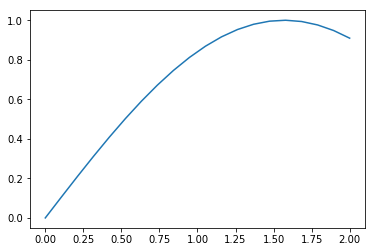

In [10]:
# very basic plot
ax = plt.plot(x,y)

Text(0, 0.5, 'y-value (a.u.)')

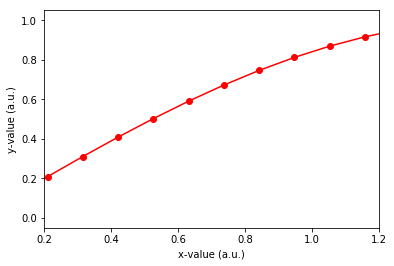

In [11]:
# a bit more advanced plot
fig, ax = plt.subplots()
ax.plot(x, y, "o-r")
ax.set_xlim((0.2, 1.2))
ax.set_xlabel("x-value (a.u.)")
ax.set_ylabel("y-value (a.u.)")

In [12]:
import pandas as pd

In [13]:
# you can get some information about the stuff you imported by adding a question-mark at the end
pd?

Type:        module
String form: <module 'pandas' from 'C:\\Miniconda3\\envs\\cellpy\\lib\\site-packages\\pandas\\__init__.py'>
File:        c:\miniconda3\envs\cellpy\lib\site-packages\pandas\__init__.py
Docstring:  
pandas - a powerful data analysis and manipulation library for Python

**pandas** is a Python package providing fast, flexible, and expressive data
structures designed to make working with "relational" or "labeled" data both
easy and intuitive. It aims to be the fundamental high-level building block for
doing practical, **real world** data analysis in Python. Additionally, it has
the broader goal of becoming **the most powerful and flexible open source data
analysis / manipulation tool available in any language**. It is already well on
its way toward this goal.

Main Features
-------------
Here are just a few of the things that pandas does well:

  - Easy handling of missing data in floating point as well as non-floating
    point data.
  - Size mutability: columns can be 

In [14]:
df = pd.DataFrame({"point": [1,2,3], "height": [17.4, 12.4, 8.1], "model": ["az", "tr", "x12"]})
print(df)

   point  height model
0      1    17.4    az
1      2    12.4    tr
2      3     8.1   x12


In [15]:
# jupyter-notebook-trick: just write the variable as the only item on the last line in the cell and it will print.
df

,point,height,model
0,1,17.4,az
1,2,12.4,tr
2,3,8.1,x12


In [16]:
df.height

0    17.4
1    12.4
2     8.1
Name: height, dtype: float64

In [17]:
df[["height", "model"]]

,height,model
0,17.4,az
1,12.4,tr
2,8.1,x12


# 1. Time to start the show: this is Case 4
What we would like you to do is to load data from two cell-tests and compare them. To do that, you will have to use a library that can read the data-files (cellpy). We recommend that you just run through each cell step-by-step first trying to understand what happens, but without modifying them. Then, to solve the "task" at the bottom, you will have to do some copy-pasting and gentle editing. When you start to feel comfortable with the code snippets and the form of the notebook, feel free to start to modify the content of the cells. For example, you can see what happens if you replace the number `15` in the `.get_cap` cell below with a list of numbers, *e.g.* `[1, 10, 100]`.

#### Importing `cellpy` for help in loading the cell data

In [18]:
import cellpy
from cellpy import cellreader

**This is what we know about the cells** (from the log)

We have two cells. Both are half-cells with amorphous Si thin-films as active material and Li metal as counter electrode. One has been cycled with using FEC as electrolyte additive. 
1. `20150204_TF5_CUA_08_cc`: standard LP30 electrolyte
2. `20150430_TF5_CUA_13_cc`: LP30 + FEC

**Loading the data**

In [19]:
file_01 = "raw_data/20150204_TF5_CUA_08_cc.h5"
file_02 = "raw_data/20150430_TF5_CUA_13_cc.h5"

In [20]:
cell_01 = cellreader.CellpyData().load(file_01)
cell_02 = cellreader.CellpyData().load(file_02)

#### Start looking into what we have
##### voltage-capacity cycles

In [21]:
cycle_15_cell_01 = cell_01.get_cap(15)

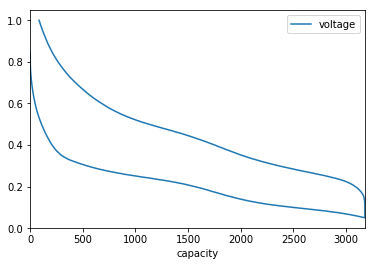

In [22]:
# the object returned by the method .get_cap is a pandas DataFrame. This is a "short-cut" way for plotting it:
cycle_15_cell_01.plot(x="capacity", y="voltage")

##### crating dqdv

In [23]:
# create a custom function for making dqdv
from cellpy.utils import ica
import pandas as pd

def make_dqdv(cell, cycle_number):
    voltage_cycle = cell.get_cap(cycle_number, method="forth-and-forth", categorical_column=True)
    ica_x, ica_y = ica.dqdv_cycle(voltage_cycle)
    frame = pd.DataFrame({"voltage": ica_x, "dqdv": ica_y})
    return frame
    

In [24]:
dqdv_15_cell_01 = make_dqdv(cell_01, 15)

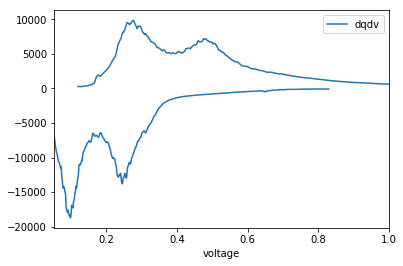

In [25]:
dqdv_15_cell_01.plot(x="voltage", y="dqdv")

In [26]:
# get summary data for cell_01
all_summaries_cell_01 = cell_01.dataset.dfsummary.reset_index()

In [27]:
# lets have a brief look at it (if you want to know the name of all the columns, you can issue print(all_summaries_cell_01.columns))
all_summaries_cell_01.head()

,Cycle_Index,Data_Point,Test_Time,Date_Time_Txt(str),IR_Charge(Ohms),IR_Discharge(Ohms),End_Voltage_Charge(V),End_Voltage_Discharge(V),DateTime,Charge_Capacity,...,Cumulated_Discharge_Capacity_Loss(mAh/g),Charge_Capacity_Loss(mAh/g),Cumulated_Charge_Capacity_Loss(mAh/g),Low_Level(percentage),High_Level(percentage),RIC(none),RIC_SEI(none),RIC_Disconnect(none),Charge_Endpoint_Slippage(mAh/g),Discharge_Endpoint_Slippage(mAh/g)
0,1,18593,236804.180001,2015-02-07 08:54:32,225.475693,386.578583,1.000085,0.04987,42042.371204,0.000054,...,NaN,NaN,NaN,6.490022,22.259516,NaN,NaN,NaN,1886.949063,6471.868809
1,2,26077,351232.434426,2015-02-08 16:41:43,206.593033,251.332260,1.000085,0.04987,42043.695637,0.000053,...,1721.457992,61.131263,61.131263,7.269473,17.118139,0.722054,0.061339,0.022658,2113.571397,4977.033150
2,3,34735,483497.508805,2015-02-10 05:26:11,151.037003,217.057327,1.000085,0.04987,42045.226516,0.000062,...,1284.973544,-448.638317,-387.507054,8.007122,19.357043,0.637856,0.312817,-0.147484,2328.039862,5627.986064
3,4,43609,618992.608526,2015-02-11 19:04:29,136.069824,184.394073,1.000085,0.04987,42046.794780,0.000064,...,1226.190464,-101.488378,-488.995432,8.597888,20.149990,0.674473,0.401377,-0.180376,2499.803028,5858.532310
4,5,52518,755035.847926,2015-02-13 08:51:55,121.222794,161.413483,1.000085,0.04987,42048.369398,0.000064,...,1224.614380,-25.535601,-514.531033,9.106248,20.663771,0.720356,0.455768,-0.188389,2647.606678,6007.912045


In [28]:
charge_cap_01 = all_summaries_cell_01["Charge_Capacity(mAh/g)"]
discharge_cap_01 = all_summaries_cell_01["Discharge_Capacity(mAh/g)"]
cycle_number_01 = all_summaries_cell_01["Cycle_Index"]

In [29]:
# plotting capacity vs cycle number

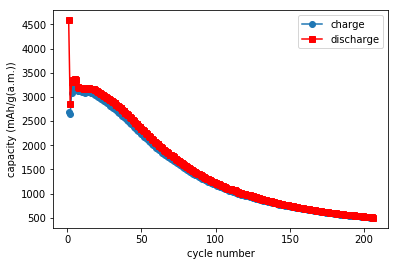

In [30]:
fig, ax = plt.subplots()
ax.plot(cycle_number_01, charge_cap_01, 'o-', label="charge")
ax.plot(cycle_number_01, discharge_cap_01, 's-r', label="discharge")
ax.set_xlabel("cycle number")
ax.set_ylabel("capacity (mAh/g(a.m.))")
ax.legend()

**Compare charge capacity vs cycle for both cells**

In [31]:
# pick the summary data
all_summaries_cell_02 = cell_02.dataset.dfsummary.reset_index()

In [32]:
# select the columns


In [33]:
# create the figure (including both cells)


# 2. What did we find out?

*1. What is the best cell?*  
*2. For how many cycles did each cell live?*  
*3. Is adding FEC a good thing?*

1:

2:

3: